# Aula_220324_HeartAttack

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# About DataSet There are 13 attributes: 
1. Age: Age (in years) 

2. Sex: gender (1 = male; 0 = female) 

3.ChestPain: Chest Pain type -- 1: typical angina (all criteria present) -- 2: atypical angina (two of three criteria satisfied) -- 3: non-anginal pain (less than one criteria satisfied) -- 4: asymptomatic (none of the criteria are satisfied) 

4. tRestbps: Resting Blood pressure (in mmHg, upon admission to the hospital) 

5. Chol: serum cholesterol in mg/dL 

6. Fbs: fasting blood sugar > 120 mg/dL (likely to be diabetic) 1 = true; 0 = false 

7. RestECG: Resting electrocardiogram results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

8. thalach: Greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise. 

9.Exang: exercise induced angina (1 = yes; 0 = no) 

10. Oldpeak: ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest) 

11. Slope: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 

12.Ca: number of major vessels (0-3) colored by fluoroscopy. Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue). 

13. thal: 0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test) 

14.num: 0 = no disease, 1 = disease

In [2]:
df=pd.read_csv('..\datasets\HeartAttack.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\benso\AppData\Local\Temp\ipykernel_748\3612371713.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('..\datasets\HeartAttack.csv')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,Male,atypical angina,130,132,FALSE,2,185,no,0.0,?,?,?,0
1,29,Male,atypical angina,120,243,FALSE,0,160,no,0.0,?,?,?,0
2,29,Male,atypical angina,140,?,FALSE,0,170,no,0.0,?,?,?,0
3,30,Female,typical angina,170,237,FALSE,1,170,no,0.0,?,?,fixed defect,0
4,31,Female,atypical angina,100,219,FALSE,1,150,no,0.0,?,?,?,0


In [3]:
df.describe()

,age,oldpeak,num
count,294.000000,294.000000,294.000000
mean,47.826531,0.586054,0.360544
std,7.811812,0.908648,0.480977
min,28.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000
75%,54.000000,1.000000,1.000000
max,66.000000,5.000000,1.000000


In [4]:
df.dtypes

age             int64
sex            object
cp             object
trestbps       object
chol           object
fbs            object
restecg        object
thalach        object
exang          object
oldpeak       float64
slope          object
ca             object
thal           object
num             int64
dtype: object

In [5]:
df.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [6]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [7]:
df=df.drop(['slope','ca','thal'],axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,Male,atypical angina,130,132,FALSE,2,185,no,0.0,0
1,29,Male,atypical angina,120,243,FALSE,0,160,no,0.0,0
2,29,Male,atypical angina,140,?,FALSE,0,170,no,0.0,0
3,30,Female,typical angina,170,237,FALSE,1,170,no,0.0,0
4,31,Female,atypical angina,100,219,FALSE,1,150,no,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,Male,asymptomatic,160,331,FALSE,0,94,yes,2.5,1
290,54,Female,non-anginal pain,130,294,FALSE,1,100,yes,0.0,1
291,56,Male,asymptomatic,155,342,TRUE,0,150,yes,3.0,1
292,58,Female,atypical angina,180,393,FALSE,0,110,yes,1.0,1


In [8]:
df.rename(columns={'num':'target'}, inplace=True)
df=df.replace('?',None)

In [9]:
df.isna().sum()

age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        1
thalach        1
exang          1
oldpeak        0
num            0
dtype: int64

# Tratamento do atributo 'restecg'

In [10]:
atributo = 'restecg'

In [11]:
df[df[atributo].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
268,55,Male,typical angina,140,295,FALSE,None,136,no,0.0,1


In [12]:
df = df.drop(268)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,Male,atypical angina,130,132,FALSE,2,185,no,0.0,0
1,29,Male,atypical angina,120,243,FALSE,0,160,no,0.0,0
2,29,Male,atypical angina,140,None,FALSE,0,170,no,0.0,0
3,30,Female,typical angina,170,237,FALSE,1,170,no,0.0,0
4,31,Female,atypical angina,100,219,FALSE,1,150,no,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,Male,asymptomatic,160,331,FALSE,0,94,yes,2.5,1
290,54,Female,non-anginal pain,130,294,FALSE,1,100,yes,0.0,1
291,56,Male,asymptomatic,155,342,TRUE,0,150,yes,3.0,1
292,58,Female,atypical angina,180,393,FALSE,0,110,yes,1.0,1


In [13]:
df.isna().sum()

age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        0
thalach        1
exang          1
oldpeak        0
num            0
dtype: int64

# Tratamento do atributo 'sex'

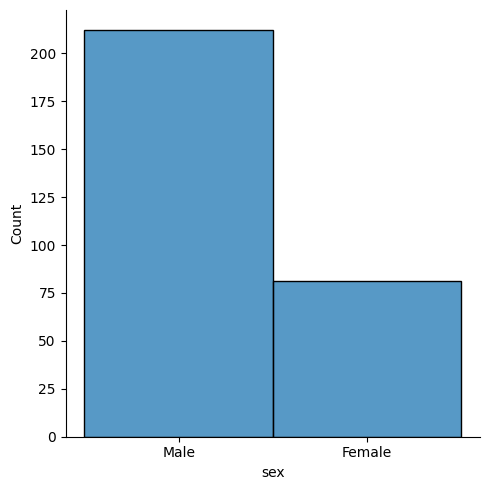

In [14]:
sns.displot(df['sex'].dropna())

In [15]:
df.groupby('sex').count()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
sex,,,,,,,,,,
Female,81,81,80,74,77,81,80,80,81,81
Male,212,212,212,196,208,212,212,212,212,212


In [16]:
mapa_fbs = { 'Male': 1, 'Female': 0 }
df['sex_encoded'] = df['sex'].map(mapa_fbs)

posicao_desejada = 1
nome_coluna = 'sex_encoded'
coluna = df.pop(nome_coluna)
df.insert(posicao_desejada, nome_coluna, coluna)
df=df.drop(['sex'],axis=1)
df

,age,sex_encoded,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,atypical angina,130,132,FALSE,2,185,no,0.0,0
1,29,1,atypical angina,120,243,FALSE,0,160,no,0.0,0
2,29,1,atypical angina,140,None,FALSE,0,170,no,0.0,0
3,30,0,typical angina,170,237,FALSE,1,170,no,0.0,0
4,31,0,atypical angina,100,219,FALSE,1,150,no,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,asymptomatic,160,331,FALSE,0,94,yes,2.5,1
290,54,0,non-anginal pain,130,294,FALSE,1,100,yes,0.0,1
291,56,1,asymptomatic,155,342,TRUE,0,150,yes,3.0,1
292,58,0,atypical angina,180,393,FALSE,0,110,yes,1.0,1


# Tratamento do atributo 'cp'

In [17]:
atributo = 'cp'

In [18]:
mapa_cp = { 'typical angina': 1, 'atypical angina': 2, 'non-anginal pain': 3, 'asymptomatic': 4 }
df['cp_encoded'] = df['cp'].map(mapa_cp)
posicao_desejada = 2
nome_coluna = 'cp_encoded'
coluna = df.pop(nome_coluna)
df.insert(posicao_desejada, nome_coluna, coluna)
df=df.drop(['cp'],axis=1)
df

,age,sex_encoded,cp_encoded,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,FALSE,2,185,no,0.0,0
1,29,1,2,120,243,FALSE,0,160,no,0.0,0
2,29,1,2,140,None,FALSE,0,170,no,0.0,0
3,30,0,1,170,237,FALSE,1,170,no,0.0,0
4,31,0,2,100,219,FALSE,1,150,no,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,FALSE,0,94,yes,2.5,1
290,54,0,3,130,294,FALSE,1,100,yes,0.0,1
291,56,1,4,155,342,TRUE,0,150,yes,3.0,1
292,58,0,2,180,393,FALSE,0,110,yes,1.0,1


# Tratamento do atributo 'trestbps'

In [19]:
atributo = 'trestbps'

In [20]:
df[df[atributo].isna()]

,age,sex_encoded,cp_encoded,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
90,48,0,2,None,308,FALSE,1,None,None,2.0,0


In [21]:
df[[atributo]] = df[[atributo]].apply(pd.to_numeric)

In [22]:
df[atributo] = df[atributo].fillna(df[atributo].mean()).round()
df.loc[[90]]

,age,sex_encoded,cp_encoded,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
90,48,0,2,133.0,308,FALSE,1,None,None,2.0,0


In [23]:
df.isna().sum()

age             0
sex_encoded     0
cp_encoded      0
trestbps        0
chol           23
fbs             8
restecg         0
thalach         1
exang           1
oldpeak         0
num             0
dtype: int64

# Tratamento do atributo 'chol'

In [24]:
atributo = 'chol'

In [25]:
df[df[atributo].isna()]

,age,sex_encoded,cp_encoded,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
2,29,1,2,140.0,None,FALSE,0,170,no,0.0,0
31,39,1,2,120.0,None,FALSE,1,146,no,2.0,0
34,39,1,2,130.0,None,FALSE,0,120,no,0.0,0
44,40,1,3,140.0,None,FALSE,0,188,no,0.0,0
65,43,0,3,150.0,None,FALSE,0,175,no,0.0,0
72,45,0,2,180.0,None,FALSE,0,180,no,0.0,0
75,45,1,3,135.0,None,FALSE,0,110,no,0.0,0
86,47,0,3,130.0,None,FALSE,0,145,no,2.0,0
91,48,0,2,120.0,None,TRUE,1,148,no,0.0,0
97,48,1,2,100.0,None,FALSE,0,100,no,0.0,0


In [26]:
df[[atributo]] = df[[atributo]].apply(pd.to_numeric)

In [27]:
df[atributo] = df[atributo].fillna(df[atributo].mean()).round()

In [28]:
df.isna().sum()

age            0
sex_encoded    0
cp_encoded     0
trestbps       0
chol           0
fbs            8
restecg        0
thalach        1
exang          1
oldpeak        0
num            0
dtype: int64

# Tratamento do atributo 'fbs' (1 = true; 0 = false)

In [29]:
atributo = 'fbs'

In [30]:
mapa_fbs = { 'FALSE': 0, 'TRUE': 1 }
df['fbs_encoded'] = df[atributo].map(mapa_fbs)

posicao_desejada = 5
nome_coluna = 'fbs_encoded'
coluna = df.pop(nome_coluna)
df.insert(posicao_desejada, nome_coluna, coluna)
df=df.drop([atributo],axis=1)
df.head()

,age,sex_encoded,cp_encoded,trestbps,chol,fbs_encoded,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2,185,no,0.0,0
1,29,1,2,120.0,243.0,0.0,0,160,no,0.0,0
2,29,1,2,140.0,251.0,0.0,0,170,no,0.0,0
3,30,0,1,170.0,237.0,0.0,1,170,no,0.0,0
4,31,0,2,100.0,219.0,0.0,1,150,no,0.0,0
